## Summary Statistics (and what they mean)

Welcome! In this (very first) post, we are going to be going over a few basic statistical concepts involving summary statistics and how we can use them. This is a great place to start for getting some idea on how statistics can work for you! 

Statistics courses usually start with a discussion of summary statistics, and for good reason. Summary statistics are the essential building blocks of statistics. When we talk about expectation, or prediction, we are actually talking about a summary statistic -- in many cases, and algorithms, the mean. For the most part, summary statistics can give us a good idea of the underlying distribution and, in some cases, are <b> sufficient </b> in describing a set of data points for a particular algorithm.

# Don't Be Another Statistic

The first question that will come up immediately when discussing this is what exactly a statistic is. In everyday language many people use statistic to mean a way of summarizing data into a single data point. When people say things like "You are not just a statistic!", what they are generally referring to is how statistics are <b> aggregates </b> of data. That is, statistics cannot capture all of the truth, but only an average.  

So is it fair to say that statistics are purporting to be cold-hard facts gathered from data? Not exactly. Statistics are gathered from sample data, and are often used as an estimation of the population. In statistician speak, a <b> population </b> is the theoretical overarching group that we wish to infer about. For instance, the population can be men living in the United States, all of the atoms in the universe, or the set of all possible combinations of people into couples. A <b> sample </b> is a subset of the population, a smaller group derived from it.

We use statistics derived from the sample to make inferences about the population, but by definition these are not exact -- they depend on the sample that we choose. Almost surely, if we were to choose another sample we would come up with a different statistic. Therefore, a statistician would not take a summary statistic to be the hard, cold "truth", but a signal, or estimation, of the "cold hard truth." 

# Statistics vs Statistic

Unfortunately, much of the confusion about the nature of a <b> statistic </b> has to do with the field known as <b> statistics.</b> Confusing, but true. Statistics is generally what people are referring to when they talk about the hand-wavy idea -- "gathering insights from data." But this treats data as though it is a fixed, constant thing. This couldn't be further from the case! This is exactly what makes statistics such an interesting field -- statistics deals with random variation. Statistics isn't used for cases of absolute certainty, like many of the sciences do, but revels in the uncertainty of real life. Indeed, nearly everything has random variation involved in it, and therefore nearly everything is in the scope of statistics. The way we can quantify uncertainty is by using the theories of <b> probability.</b> But that is for another post! 

In general, we do not say that a statistic is the "ground truth" but a description of <b> sample data. </b> This sample statistic is then used to estimate the </b> population parameters.</b> This comes from the initial distinction that many people make -- samples themselves are not a representation of the ground truth. When a statistic is used as a statement about the population, we call this statistic an <b> estimator </b> of the population parameter.

In fact, population parameters are not nearly as interesting as sample statistics. A population parameter is not probabilistic at all -- if it is obtainable, then it will be a single value with no variation. Sample statistics, however, do vary, and sometimes considerably based on how the data is sampled and how large the sample is. 

But, I could go on all day about this. Luckily for you, I won't. I am going to be using some code to give examples of how these things work. Don't worry if you don't understand how the code works, as I will create a future article describing how this code is written using python. In this post, which I will be calling a "framework" post, I will only be describing how these things work. Then, in a "application" post, I will show how to write code to solve these problems with real-world data. 

# Class Grades

Now, onto an example. Suppose we have a class of 7th graders who had gotten the following grades on the previous exam: 95, 80, 50, 80, 100, 94. 

Let's start with the situation where this is the entire class. In this case, we are dealing with the <b>population.</b> That means, if we take the common 'statistics', we will not have a statistic at all but a <b> parameter. </b> This distinction makes it clear that we are not estimating anything, but are looking at the "cold, hard truth." The population is then "the grades of 7th graders on math test last week." 

If, however, we were trying to estimate their performance in the class overall from this test alone, then this is a <b> sample </b>, presuming there were other tests. Thus, the phrasing of the question is a large distinction. 

In [1]:
from itertools import combinations
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib as plt
%matplotlib inline

In [2]:
class_grades = pd.Series({
    'John': 95,
    'Mary': 80,
    'Jacob': 50,
    'Jose': 80,
    'Sarah': 100,
    'Laura': 94
})
class_grades

Jacob     50
John      95
Jose      80
Laura     94
Mary      80
Sarah    100
dtype: int64

# Central Tendency

Given a set of data points, where do we start? A good start is determining the <b> central tendency </b> or what we often call the <b> average. </b> Here, I use the word <b> average </b> as a general case of central tendency -- we want to know what the average student in this class looks like. All of the following examples assumes that we have some <b> finite </b> sample of a <b> finite </b> population, but can be extended in the more general case. 

### Arithmetic Mean

One common example of an average is the arithmetic mean. We are all familiar with this from our schooling days:

$$
\begin{equation}
\bar{X}_{mean} = \frac{ \sum_{i=0}^{n} x_{i} }{n} 
\end{equation}
$$

Here, we say that we sum over all of the possible values, and divide by the total number. We can see the results on our simple dataset above: 

$$
95 + 80 + 50 + 80 + 100 + 94 = 499 = T \\
\bar{x} = \frac{T}{6} = 83.166
$$

In [3]:
mean = class_grades.mean()
mean

83.16666666666667

### Median

Another measure of central tendency is the median. The <b> median </b> is the value which half of the data is smaller and half is larger than. If there is an even number of points, we take the average of the two closest to the "center" of the ranked numbers. 

For example, we first list the points from smallest to largest: 

$$ 
50, 80, 80, 94, 95, 100
$$

Then, we iteratively remove points from each side until we arrive at a single value (if the total number of points is odd) or two values (if it is even). This is shown below: 

$$ 
50, 80, 80, 94, 95, 100\\
    80, 80, 94, 95\\
        80, 94\\
$$

Now that we have two values (since 6 = n is even), we take an average of these values. That is:

$$
\frac{(80 + 94)}{2} = 87
$$

Note that we can also express this as follows:

Rank the $X_i$ from smallest to largest, where $i = 1, ..., n$. 
Define $X^{(i)}$ as the $i$th <b>order statistic</b>, where $i$ is the rank in this list. 

Then:
$$
\begin{equation}
\tilde{X}_{median} = 
\begin{cases}
    X^{(\frac{n+1}{2})},                               & \text{if n is odd}\\
    \frac{X^{(\frac{n+2}{2})} + X^{(\frac{n}{2})}}{2}, & \text{if n is even}
\end{cases}
\end{equation}
$$

Then, $n$ in this case is 6, which is even. So we take the average of the 3rd and 4th order statistic, 80 and 94. This is the same result we had derived earlier. 

In [4]:
median = class_grades.median()
median

87.0

### Mode

Finally there is the mode. The mode is simply the most likely value, or the most recurring value. Thus there can be multiple modes if there are two values which are equally likely and are the most recurring in the dataset. 

We can summarize this by looking at the frequencies of each data point. For convenience, I have done this using pandas. 

In [5]:
class_grades.value_counts()

80     2
95     1
94     1
100    1
50     1
dtype: int64

Because 80 occurs twice, it is the mode. 

In [6]:
mode = class_grades.mode()
mode

0    80
dtype: int64

For all unique values $u_j$ of $x_i$ in the sample, let $f(u_j) = \sum_{x_i} 1, \forall x_i = u_j$

Then, $f(u_j)$ is the <b> frequency </b> of unique value $u_j$. Then:
$$
\begin{equation}
\hat{X}_{mode} = \{ u_j \mid f(u_j) = \max_{u_j}f(u_j) \}
\end{equation}
$$

The set notation implies that it is possible for there to be multiple modes. If there is only one mode, such as in the case of the class grades, then we say that the sample is <b> unimodal. </b>

# Other Measures of Central Tendency 

These are all of the canonical measures of central tendency that you have likely heard about before. However, there are others as well such as those listed [here](https://en.wikipedia.org/wiki/Central_tendency). Check them out -- they're pretty interesting! For fun, I will show some examples below.

### Trimean

The trimean is the <b> weighted </b> arithmetic mean of the median and two <b> quartiles.</b> That's a lot to unpack, so let me explain. 

 By weighted, we mean that the observations are multiplied by some set of constants that place a magnitude on a particular observation. Higher weighted variables are considered more "important" to the calculation. Instead of dividing by the sample size, we divide instead by the <b> sum of the weights </b>. 

Another way of looking at this is that each observation is considered to have a probability of occurring, $\frac{w_i}{\sum_{i}w_i}$. Then, the weighted average is a generalization of the arithmetic average explained before, where the arithmetic average weighs each value equally, i.e, $w_i = c$ for all $i$. Then we arrive at the same formula we saw in equation (1).   

A <b> quartile </b> is the point that is greater then some multiple of 25% of the data. If there is no such discrete number, we take a weighted average to determine its value. It is called a quartile because it separates the data into four segments. The first quartile is the data point which is greater than 25% of the data, the second is the median (50% of the data), the third is for 75% of the data, and the forth quartile is also the maximum, greater than all of the data. Interestingly, this is often not considered a quartile, but by the same logic it can be considered one. 

The trimean is then defined as:

$$
\begin{equation}
TM = \frac{Q_1 + 2M + Q_3}{4}
\end{equation}
$$

Intuitively, this is the average of the Median (M) and the midhinge, defined as:

$$ 
\begin{equation}
MH = \frac{Q_1 + Q_3}{2} 
\end{equation}
$$

This is calculated below:

In [7]:
def trimean(series):
    T = series.quantile(.25) + 2 * series.median() + series.quantile(.75)
    TM = T / 4
    return (TM)


TM = trimean(class_grades)
TM

87.1875

In practice, it turns out that this estimator is a remarkably <b> efficient </b> estimator of the population, meaning it can accurately estimate the population mean if calculated on a sample with relatively fewer points than other estimators. For a symmetric distribution like the <b> normal </b> distribution, it is the most efficient as compared with the median, and other L-3 estimators. See [here](https://en.wikipedia.org/wiki/Trimean) for more information. It is also is more robust than the mean, which will be discussed further below.  

### Winsorized Mean

This will be a good segue into the next section, which examines the most appropriate method of central tendency to use. The Winsorized Mean attempts to mitigate the effect of outliers -- values that are very far from what we would call the "average" value. If this doesn't make sense yet, don't worry. I'll be discussing it further later in the section on robustness. For now, we will just examine what this will look like.

In the Winsorized mean, we will take the most extreme values of our sample and replace them with the most extreme remaining values. In this case, this is 50 and 100. So, our new, adjusted, sample to calculate the central tendency is: 

$$
\tilde{S} = {80, 80, 80, 94, 95, 95}
$$

Here, we replaced 50 with 80 -- the next smallest value -- and 100 with 95 -- the next largest value. In this case, the data is quite small, so we would likely not want to do this, but for a large dataset this can be useful. We then take the average of the remaining values. 

$$ 
\frac{ \sum_i \tilde{s}_{i} }{n},\\
\forall \tilde{s}_i \in \tilde{S}
$$

If you don't understand the notation, don't worry. We're just taking an average of our "new" sample. I just did it to be precise. 

In general, we can take the largest and smallest p% of data and replace it with the most extreme values within this range. This value is arbitrary, but is often taken to be 10 to 25% of the ends replaced. In this example, we take the top and bottom 10%, which trims the most extreme values on both sides.

In [8]:
def winsorized_mean(series, percent_removed):
    ## Taking the value which is greater than/less than percent_removed
    bot_quant = series.quantile(percent_removed)
    top_quant = series.quantile(1 - percent_removed)

    #Finding the values to replace
    bottom = series[series < bot_quant]
    top = series[series > top_quant]

    #Replacements
    rep_bottom = min(series[series > bot_quant])
    rep_top = max(series[series < top_quant])

    replacement_dic = {b: rep_bottom for b in bottom}
    replacement_dic.update({t: rep_top for t in top})

    # Make replacements, find mean
    S_tilde = series.replace(replacement_dic)
    winsorized_mean = S_tilde.mean()
    return (winsorized_mean)


wm = winsorized_mean(class_grades, .1)
wm

87.33333333333333

But wait! How can you just replace values like that! 

I know, it seems dishonest. The idea is that these values are extremely unlikely. In the case of 6 people, this is probably not the case. But imagine we had the following values: 

$$
0, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 95, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 96, 100
$$

In [9]:
ex_outliers = pd.Series(
    np.concatenate([[0], np.repeat(95, 18),
                    np.repeat(96, 12), [100]]))
ex_outliers.mean()

92.5625

But, would we say that the average student received a grade of 92? This seems like an underestimation. Naively, if we choose the Winsorized mean, we would get the following: 

In [10]:
winsorized_mean(ex_outliers, .1)

95.40625

This seems like a more accurate representation of the data. In the cases of outliers, one must be careful to examine the distribution of the data well before naively using one measure of central tendency, as the results may be very misleading.

# Which to choose? 

This is not always clear, as we saw above for the Windsorized mean. If we look at a histogram of the values, we can get a sense of the <b> shape </b> of the distribution. It turns out that the shape can help us determine which measure of central tendency best describes the distribution. 

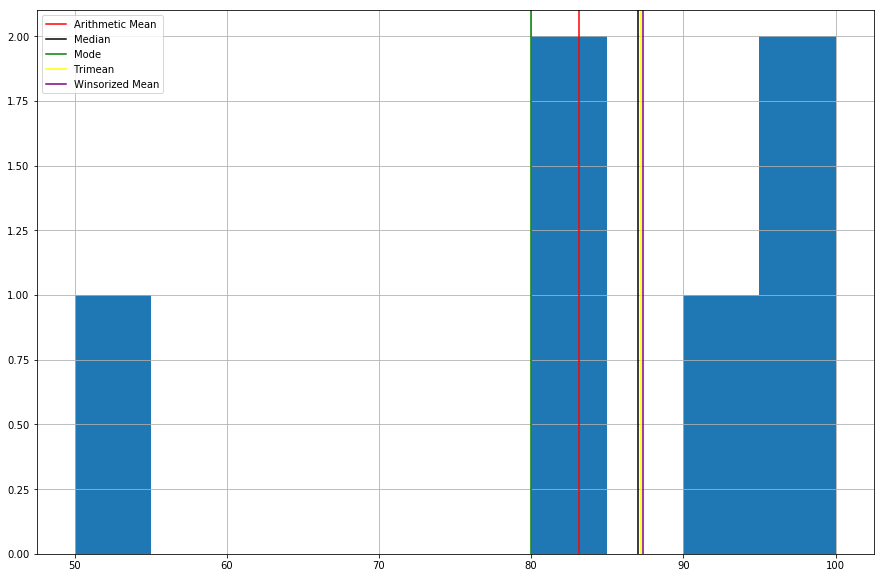

In [11]:
plt.pyplot.figure(figsize=(15, 10))
plot = class_grades.hist()
plot.axvline(x=mean, color='red', label='Arithmetic Mean')
plot.axvline(x=median, color='black', label='Median')
plot.axvline(x=mode[0], color='green', label='Mode')
plot.axvline(x=TM, color='yellow', label='Trimean')
plot.axvline(x=wm, color='purple', label='Winsorized Mean')
plot.legend()

All of these represent central tendency. To see this more easily, let's consider it on a larger dataset. 

In [12]:
likelihood_estim = stats.beta.fit(class_grades / 100)
random_var = pd.Series(
    np.random.beta(likelihood_estim[0], likelihood_estim[1], 100)) * 100
random_var = random_var.floordiv(1)

C:\Users\Sean\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:404: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


#### If you're curious about this...

For the reasons behind why I 'created', or <b> simulated </b> the data this way, I assumed that our 6 students actually were a sample from a population. I then fit a beta distribution to the observed data, and found the maximum likelihood estimators (MLE) based on a Beta distribution (used to model probabilities). I then sampled 100 values randomly from this distribution. 

For all intents and purposes, you can consider this "new" dataset as a completely different sample. The example is included for those who are interested. I will be discussing the Beta, as well as other distributions, at a later point on this website.)

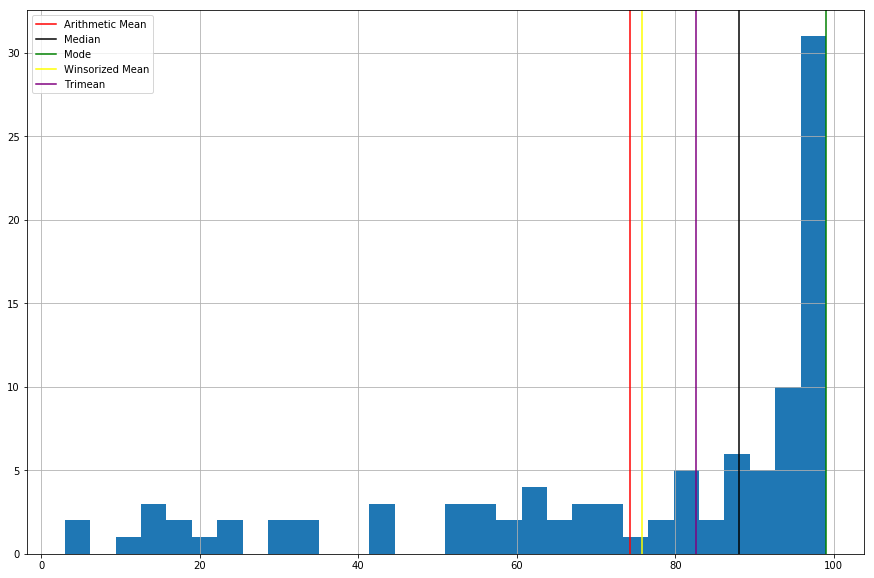

In [13]:
plt.pyplot.figure(figsize=(15,10))
plot = random_var.hist(bins=30)
plot.axvline(x=random_var.mean(), color='red', label='Arithmetic Mean')
plot.axvline(x=random_var.median(), color='black', label='Median')
plot.axvline(x=random_var.mode()[0], color='green', label='Mode')
plot.axvline(x=winsorized_mean(random_var, .1), color='yellow', label='Winsorized Mean')
plot.axvline(x=trimean(random_var), color='purple', label = "Trimean")
plot.legend()

We see that this is a skewed distribution -- in particular it is <b> left skewed </b>. A majority of the students did well on the exam, but there were some who did particularly poorly, with some extreme values on the far left. In this case, where there are many extreme values, the mean is not a good "average" -- it is dragged down by the very small values in the tail. We can see this as the mean is close to 70, but it appears that the "average" student did better than this. The median is a more <b> robust </b> measure, because it is less sensitive to anomalies in the sample. The mode is not very useful in this case, as it is at the bin with the largest values. The "average" student likely did worse than this. 

In general, as a rule of thumb, for a <b> unimodal </b> distribution (meaning there is only one mode), it is often but not always the case that:



Let $\bar{X}_{median}$ be the median of a distribution and $\bar{X}_{mean}$ be the arithmetic mean. Then:

if $\bar{X}_{median} << \bar{X}_{mean}$, 
X is <b> right skewed </b>

if $\bar{X}_{median} \approx \bar{X}_{mean}$,  
X is approximately <b> symmetric </b> 

if $\bar{X}_{median} >> \bar{X}_{mean}$, 
X is <b> left skewed </b>

This can be used as a guideline to see how skewed our distribution is. However, it is not foolproof - in some cases this fails. See [this wikipedia article](https://en.wikipedia.org/wiki/Skewness#Relationship_of_mean_and_median) for more information. For instance, consider -6, -4, 0, 0, 2, 8. The mean and median are zero, but this distribution is skewed to the left, i.e. not symmetric.  

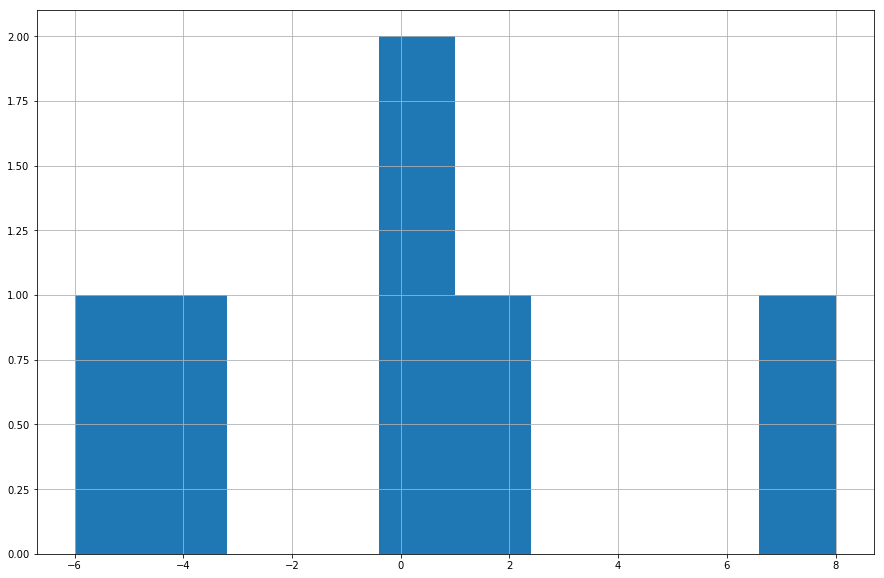

In [14]:
plt.pyplot.figure(figsize=(15,10))
example = pd.Series([-6, -4, 0, 0, 2, 8])
example.hist()
plot.axvline(x=example.mean(), color='red', label='Arithmetic Mean')
plot.axvline(x=example.median(), color='black', label='Median')
plot.legend()

In general, since the median is a more robust measure, if we are given a sample and wish to estimate the behavior of the population and we believe that the skewed values are <b> anomalies </b>, the median is a better "guess" of the central tendency. 

Interestingly, the two "non-typical" central tendency estimators, the Windsorized mean and the Trimean, lay between the mean and the median. The Windsorized mean and Trimean are both more robust then the mean, meaning they are less sensitive to extreme values. This is directly dealt with in the Windsorized mean and is implicit in the Trimean in a method similar to taking the median. 

Notice also that the median and mean tell us different things about the data. The mean uses all of the information available, and each data point contributes equally to the evaluation of it. On the other hand, the median "cuts away" all of the data not at the 50% mark. In this way, the median can be seen as an extreme version of the Windsorized Mean where we cut out the bottom 49% and 51%. In this case, we are seeing a trade-off between <b> robustness </b> which is the variability of the estimator under anomalies and varying sample distributions, and <b> power </b> (or <b>efficiency</b>), which can determine a more stable solution with less data assuming certain assumptions are met. For instance, if we know that the population distribution follows some "known" distribution, it can often be shown that the mean is a <b> sufficient, unbiased </b> estimator of the true population mean. In the case of the normal distribution, it is the most efficient estimator of the population mean, while the median is relatively inefficient. This means that the median will require more data to obtain the same level of accuracy as the mean. 

To sum it all up -- the mean is often the most <b> efficient </b> estimator in certain simplifying conditions, but is not <b> robust.</b> On the other hand, the median is <b> robust </b>, but not as <b> efficient.</b>

### Samples of samples of samples, oh my! 

Why do we care about these measures of central tendency? Well, let's take a look at how they function in terms of predicting a population parameter.

Suppose, as we talked about before, the <b> population </b> in a simplistic example is 95, 80, 50, 80, 100, 94. Let's consider all possible samples of 3 of this data. 

There are 6 data points and we wish to choose 3. This means there are 6 choose 3, or 20 possible samples. The possible samples are: 

In [15]:
possible_samples = combinations(class_grades, 3)
list(possible_samples)

[(50, 95, 80),
 (50, 95, 94),
 (50, 95, 80),
 (50, 95, 100),
 (50, 80, 94),
 (50, 80, 80),
 (50, 80, 100),
 (50, 94, 80),
 (50, 94, 100),
 (50, 80, 100),
 (95, 80, 94),
 (95, 80, 80),
 (95, 80, 100),
 (95, 94, 80),
 (95, 94, 100),
 (95, 80, 100),
 (80, 94, 80),
 (80, 94, 100),
 (80, 80, 100),
 (94, 80, 100)]

We remember from before that the population mean is 83.16666. This is a population parameter -- it is not a statistic. However, suppose we sampled randomly from this population and got the data 80, 94, 80. Then our <b> estimate </b> of the population mean would be 84.6. Remember when I said that the statistic is never the "cold hard" truth? Here is a direct example. 

However, there are some nice properties of this. Consider the means and medians of all the samples: 

In [16]:
sample_dict = {}
for i, x in enumerate(combinations(class_grades, 3)):
    sample_dict[i] = x

sample_results = pd.DataFrame(sample_dict).T
sample_results['mean'] = sample_results.mean(axis=1)
sample_results['median'] = sample_results.iloc[:, 0:3].median(axis=1)
sample_results

,0,1,2,mean,median
0,50,95,80,75.000000,80.0
1,50,95,94,79.666667,94.0
2,50,95,80,75.000000,80.0
3,50,95,100,81.666667,95.0
4,50,80,94,74.666667,80.0
5,50,80,80,70.000000,80.0
6,50,80,100,76.666667,80.0
7,50,94,80,74.666667,80.0
8,50,94,100,81.333333,94.0
9,50,80,100,76.666667,80.0


We see that both the mean and the median vary around the true population mean for each sample. This is the <b> sampling distribution of the sample mean. </b> This is what has a distribution and can vary! Remember, our population parameter is fixed, but the variation implicit in <i> each sample </i> is what controls the distribution here. Since this too is a distribution, we can examine statistics about it. 

In [17]:
sample_results.drop([0, 1, 2], axis=1, inplace=True)
sample_results.mean(axis=0)

mean      83.166667
median    87.200000
dtype: float64

In [18]:
mean

83.16666666666667

Hmm, that seems odd. It turns out that the expectation, or arithmetic mean, of the sampling distribution of the sample mean is equal to the true population mean! 
This property actually follows directly from the definition of the arithmetic mean.

We're going to go into some maths here, but feel free to skip over it if you don't want to. The point here is that <b> the sample mean is an unbiased estimator of the population mean </b>.

<b>Theorum 1:</b>
If $S$ is a sample of size $k$ from a population of size $N$ drawn <b>randomly</b> and <b>without replacement</b>, then the mean of the sample, $\bar{X}_S$, is an unbiased estimator of the population mean. 

Let $\bar{X}_P$ be the population mean. Then
$$
\bar{X}_P = \frac{ \sum_{i=1}^{N} x_{i} }{N}\\
$$
Let $\bar{X}_s$ be the mean of a sample of size k, called $S_s$. Then,
$$
\bar{X}_s = \frac{ \sum_j x_{j, s} }{k}\\
$$
Where $X_{j,s}$ is the $j$th observation from sample $s$. It follows that there are ${N}\choose{k}$ possible samples, ie, $s$ runs from $1$ to ${N}\choose{k}$.

Let $M =$ ${N}\choose{k}$. Then:
$$
\sum_{s=0}^{M} \frac{\bar{X}_s}{M}
=\frac{\sum_{s=0}^{M} \sum_j \frac{x_{j, s}}{k}}{M}\\
=\frac{\sum_{s=0}^{M} \sum_j x_{j, s}}{kM}
$$
Each value of the population will appear in ${N}\choose{k}$ - ${N-1}\choose{k}$ = $M - \frac{M(N-k)}{N}$ samples. We can say this because it is the total number of possible samples ${N}\choose{k}$ minus the total number of samples of size $k$ which do not contain observation $j$, ${N-1}\choose{k}$. So then we have: 

$$
\frac{M - \frac{M(N-k)}{N}}{kM} \sum_i x_i
$$
Expanding the left hand side: 
$$
\frac{M - \frac{M(N-k)}{N}}{kM}
= \frac{1}{k} - \frac{N-k}{kN}
=\frac{1}{N}
$$
so
$$ 
\sum_{s=0}^{M} \frac{\bar{X}_s}{M} = \frac{ \sum_{i=1}^{N} x_{i} }{N}\\
$$
But, we now see that this is exactly equal to the population mean, $\bar{X}_P$! Since we weighed each sample equally in this expectation, this is equivalent to sampling <b> randomly without replacement </b>. This means that we have proven the result -- the sample mean is an <b> unbiased estimator </b> of the population mean. This is a powerful result! 

Hopefully you can begin to see why statistics is so exciting now! We have proven that any inference about the population mean using a sample mean will, on average, be accurate. This fact, known as the <b> Law of Averages </b> is a feature that comes up again and again in Statistics.

However, it is important to note that while the sample mean is unbiased, it does not make it the most accurate estimator. This will be covered in the next post, when we discuss the <b> Measures of Spread. </b>

We've seemed to disregard the median in this case. Why is this? Well, the median is <b> not </b> an unbiased estimator of the population mean. However, we see that the case changes quite a bit when we take the medians! 

In [19]:
sample_results.median(axis=0)

mean      83.166667
median    87.000000
dtype: float64

In [20]:
median

87.0

In this case we see that both the mean and the median are equal to the population values. What gives?! Well, it turns out that the sample median is a <b> median unbiased estimator </b> of the population median. This one is a bit tougher to prove, so I will leave it for now. Perhaps we can get back to it when we discuss probability density functions, as it requires some use of this. 

What about the mean? Why is the mean a median unbiased estimator of the population mean? The reason is because of the Central Limit Theorum, but this is something that will take some time to discuss! However, because the sampling distribution of the sample mean will tend to a normal distribution relatively quickly, it also becomes symmetric quickly. In this case, the median converges towards the mean. That is why we see that the mean in this case is again equal to the median. We can look at a histogram to see the details:

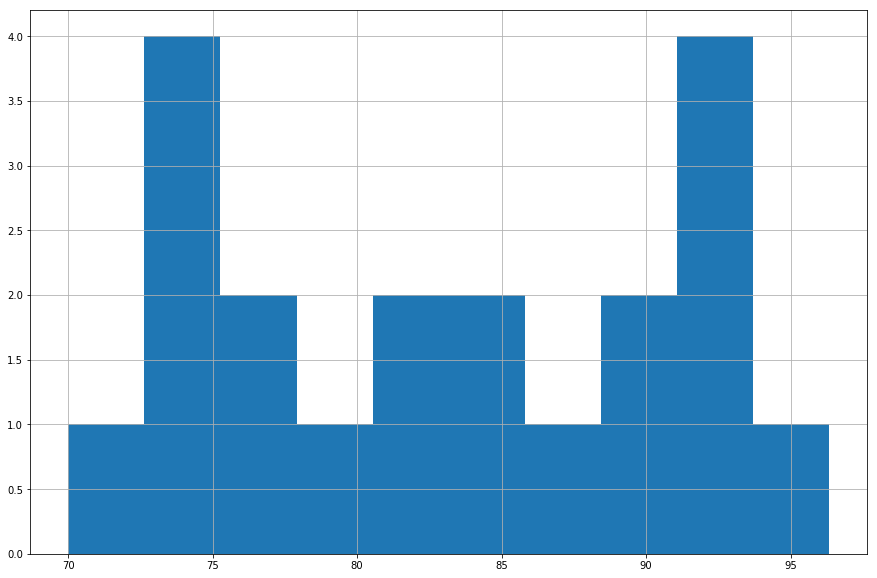

In [21]:
plt.pyplot.figure(figsize=(15,10))
sample_results['mean'].hist()

# Conclusion

In this first post, we went over what a statistic is and the distinction between a <b> sample </b> and a <b> population.</b> We also discussed measures of central tendencies and their relation to sampling distributions. 

In the next post, we will be discussing the <b> Measures of Spread </b> which will shed light further on the sampling distribution of the sample mean. Hope you enjoyed! 